<a href="https://colab.research.google.com/github/felipe-mazzi/results-analysis/blob/main/poling_scans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# This piece of code is intended to read, analyse and plot data from a surface profiler.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os
import matplotlib.font_manager as fm
from pathlib import Path

In [118]:
from google.colab import drive
drive.mount('/content/drive')
path_dados = '/content/drive/Shareddrives/MS - Felipe Boechat Mazzi/Projects/Project 11 - Periodic Poling/1st attempt/'

path = os.getcwd()
csv_files = glob.glob(os.path.join(path_dados, "*.csv"))

labels=[]
for file in csv_files:
  #r find command gives the index to the LAST occurence of the substring in the string
  n = file.rfind('/')
  name = file[n+1:-4]
  labels.append(name)


datasets = []
for file in csv_files:
  df = pd.read_csv(file, skiprows = 20, encoding = 'ascii', encoding_errors = 'ignore',index_col=False, names=['position(um)','height(angs)'])
  datasets.append(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


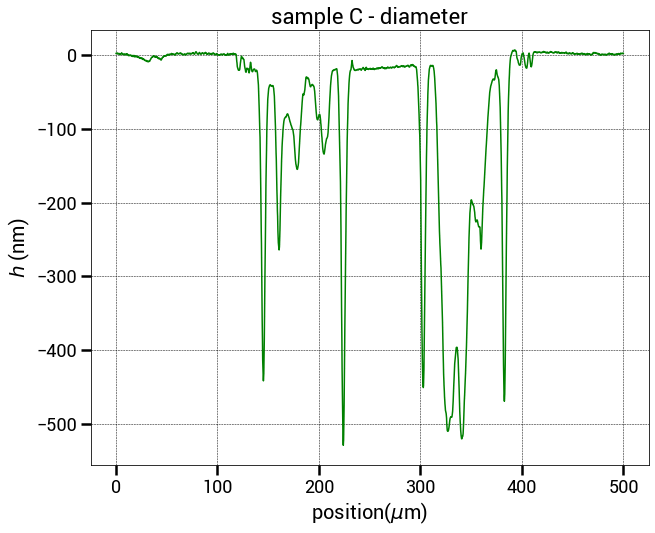

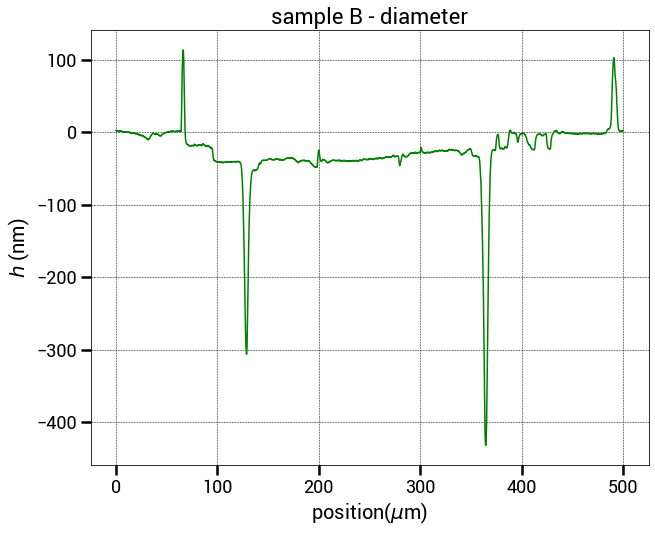

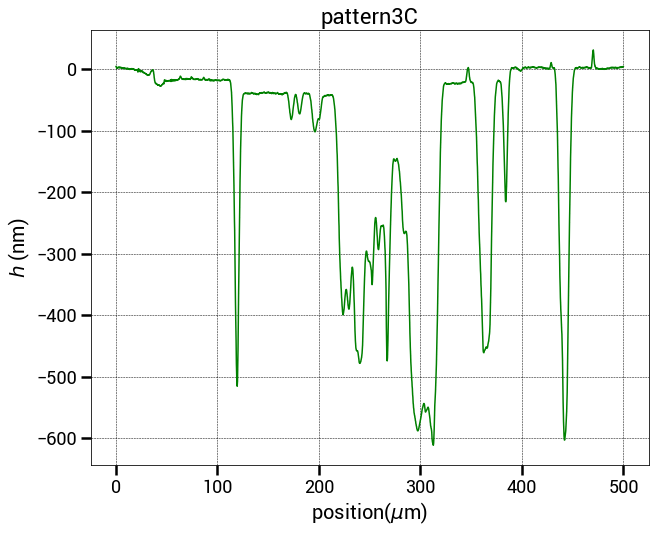

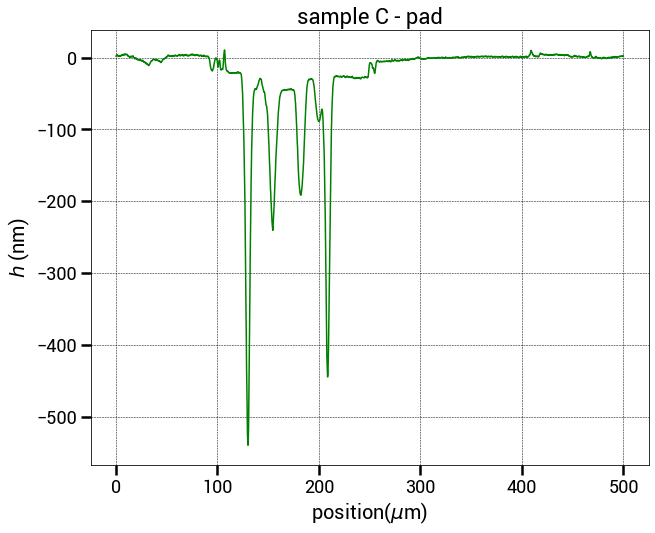

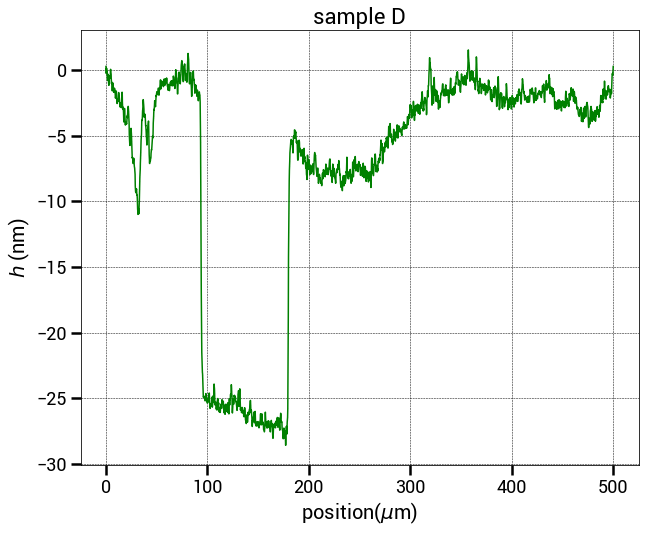

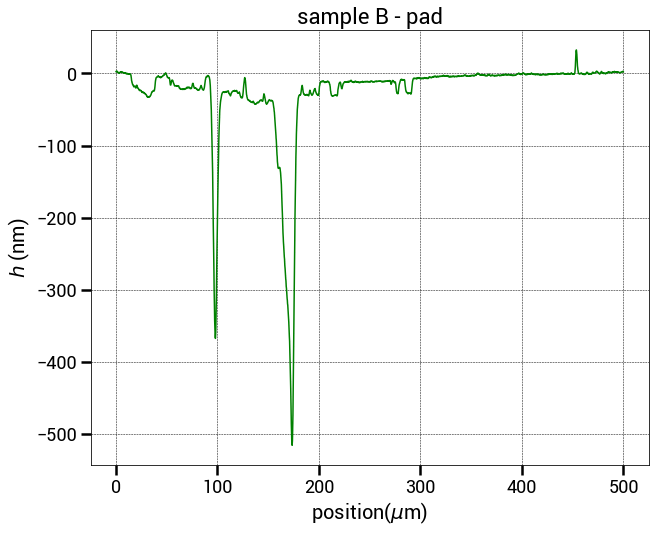

In [123]:
 def plt_config(fsize):
    plt.xticks(fontsize = fsize)#,fontweight='bold')
    plt.yticks(fontsize = fsize)#,fontweight='bold')
    #eixo.yaxis.set_minor_locator(plt.MultipleLocator(2))
    plt.tick_params(axis='both',which='minor',length=5,width=1)
    plt.tick_params(axis='both',which='major',length=10,width=2.5)
    plt.grid(True,color='black', linestyle='--', linewidth=0.5)
    return None

nth = 0
for dset in datasets:
  label = labels[nth]
  nth = nth + 1

  fig = plt.figure(figsize=(10,8))
  ax = plt.subplot()

  alpha = (dset.iloc[-1,1]/10-dset.iloc[0,1]/10)/(dset.iloc[-1,0]-dset.iloc[0,0])


  plt_config(18)
  ax.set_title(label,fontsize = 22)
  ax.set_ylabel(r'$h$ (nm)',fontsize = 20)
  ax.set_xlabel('position'+r'($\mu$m)',fontsize = 20)

  #ax.plot(dset['position(um)'],dset['height(angs)']/10, marker='o',markersize=0.01,color='black',alpha=0.3)
  #ax.plot([dset.iloc[0,0],dset.iloc[-1,0]],[dset.iloc[0,1]/10,dset.iloc[-1,1]/10], marker='o',markersize=0.01,ls='--',lw=2,color='red',alpha=0.3)
  ax.plot(dset['position(um)'],(dset['height(angs)']/10)-(alpha*dset['position(um)']), marker='o',markersize=0.01,color='green',alpha=1)

  images_dir = '/content/drive/Shareddrives/MS - Felipe Boechat Mazzi/Projects/Project 11 - Periodic Poling/1st attempt/Gráficos'
  plt.savefig(f"{images_dir}/{label}.png")
  #plt.show()
